In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates

from datetime import datetime

# Auto regression (AR) model : p

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
df = pd.read_csv('../Data/uspopulation.csv', parse_dates=True, index_col='DATE')

In [4]:
df.index.freq = 'MS'

In [5]:
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

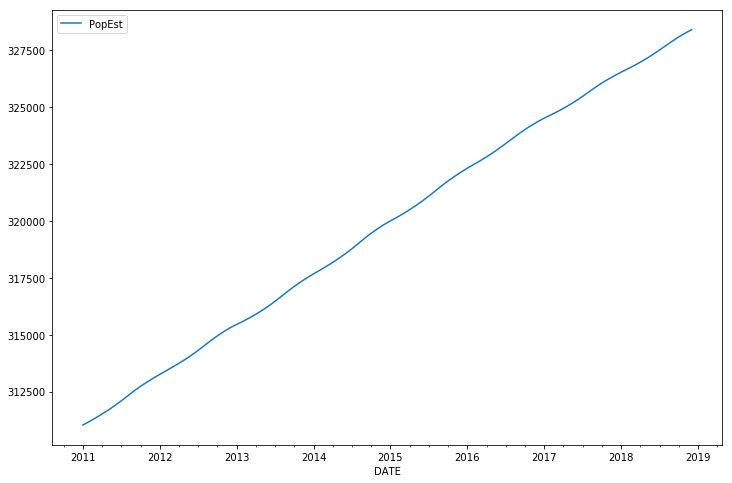

In [6]:
df.plot(figsize=(12,8))

In [7]:
len(df)

96

In [8]:
train = df.iloc[:84]
test = df.iloc[84:]

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
model = AR(train['PopEst'])

In [11]:
fitted_AR1 = model.fit(maxlag=1)

In [12]:
fitted_AR1.k_ar

1

In [13]:
fitted_AR1.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [14]:
start = len(train)
end = len(train) + len(test) - 1

print(start,end)

84 95


In [15]:
fitted_AR1.predict(start=start,end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def reg_eval_metrics (y_true,y_pred):
    
    MAE = mean_absolute_error(y_true=y_true,y_pred=y_pred)
    MSE = mean_squared_error(y_true=y_true,y_pred=y_pred)
    RMSE = np.sqrt(MSE)

    print ('MAE: ',MAE)
    print ('MSE: ',MSE)
    print ('RMSE: ',RMSE)

In [17]:
pred = test.copy()

In [18]:
pred

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [19]:
pred['AR1_pred'] =fitted_AR1.predict(start=start,end=end)
pred

,PopEst,AR1_pred
DATE,,
2018-01-01,326527,326560.403377
2018-02-01,326669,326742.749463
2018-03-01,326812,326925.038278
2018-04-01,326968,327107.269838
2018-05-01,327134,327289.444162
2018-06-01,327312,327471.561268
2018-07-01,327502,327653.621173
2018-08-01,327698,327835.623896
2018-09-01,327893,328017.569455


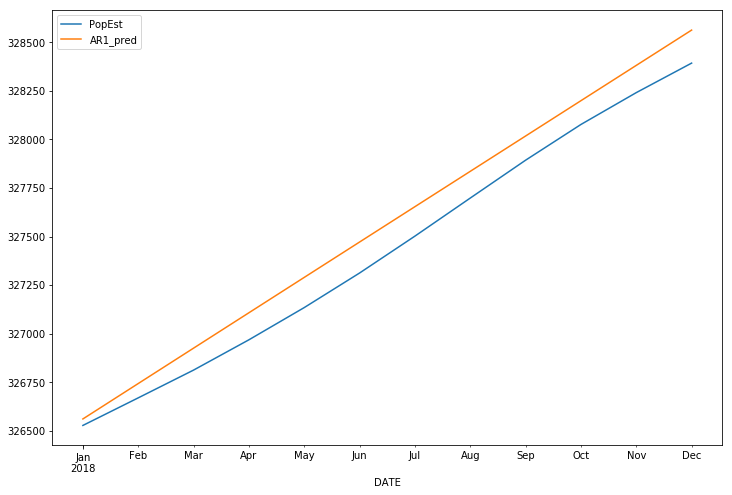

In [20]:
pred.plot(figsize=(12,8))

In [21]:
fitted_AR2 = model.fit(maxlag=2)

In [22]:
fitted_AR2.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [23]:
fitted_AR2.k_ar

2

In [24]:
pred['AR2_pred'] =fitted_AR2.predict(start=start,end=end)
pred

,PopEst,AR1_pred,AR2_pred
DATE,,,
2018-01-01,326527,326560.403377,326535.672503
2018-02-01,326669,326742.749463,326694.718510
2018-03-01,326812,326925.038278,326854.882250
2018-04-01,326968,327107.269838,327015.944948
2018-05-01,327134,327289.444162,327177.719499
2018-06-01,327312,327471.561268,327340.045896
2018-07-01,327502,327653.621173,327502.787331
2018-08-01,327698,327835.623896,327665.826847
2018-09-01,327893,328017.569455,327829.064480


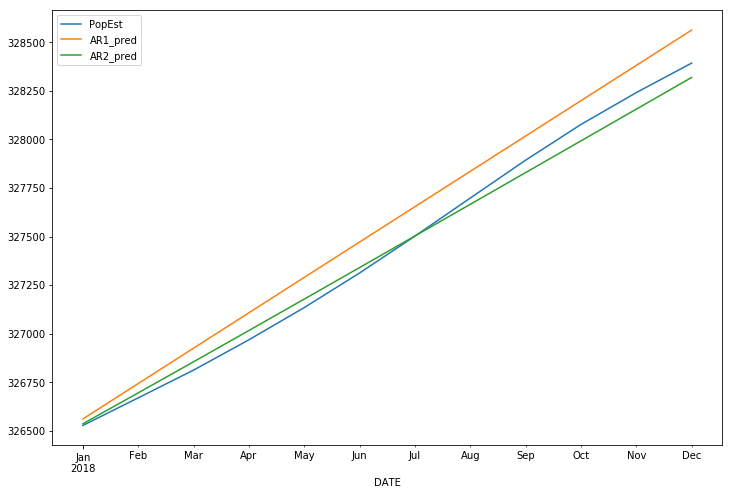

In [25]:
pred.plot(figsize=(12,8))

In [26]:
fitted_AR = model.fit(ic = 't-stat')

In [27]:
fitted_AR.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [28]:
pred['AR_pred'] =fitted_AR.predict(start=start,end=end)
pred

,PopEst,AR1_pred,AR2_pred,AR_pred
DATE,,,,
2018-01-01,326527,326560.403377,326535.672503,326523.865559
2018-02-01,326669,326742.749463,326694.718510,326662.772568
2018-03-01,326812,326925.038278,326854.882250,326805.746870
2018-04-01,326968,327107.269838,327015.944948,326960.064201
2018-05-01,327134,327289.444162,327177.719499,327130.572901
2018-06-01,327312,327471.561268,327340.045896,327315.962732
2018-07-01,327502,327653.621173,327502.787331,327511.010032
2018-08-01,327698,327835.623896,327665.826847,327710.938277
2018-09-01,327893,328017.569455,327829.064480,327907.425445


In [29]:
pred_lst = ['AR1_pred', 'AR2_pred', 'AR_pred']
for count,p in enumerate(pred_lst):
    print (p)
    reg_eval_metrics(y_true=pred['PopEst'], y_pred=pred[p])
    print ('\n')

AR1_pred
MAE:  126.75760458594111
MSE:  17449.714239577344
RMSE:  132.09736651264984


AR2_pred
MAE:  44.79063616732795
MSE:  2713.258615675103
RMSE:  52.0889490743968


AR_pred
MAE:  11.248808045920063
MSE:  186.97058618962419
RMSE:  13.673718813461983




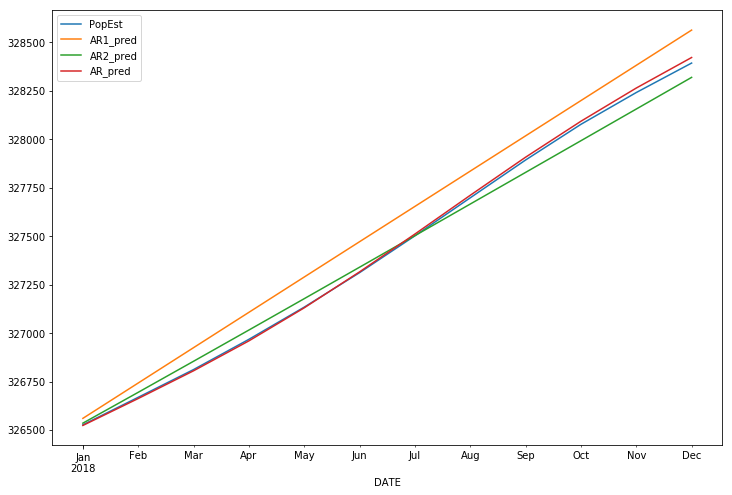

In [30]:
pred.plot(figsize=(12,8))

In [31]:
print (df.head(1))
print (df.tail(1))

            PopEst
DATE              
2011-01-01  311037
            PopEst
DATE              
2018-12-01  328393


### Forecasting

In [32]:
final_model = AR(df['PopEst'])

fitted_model = final_model.fit()

model_pred = fitted_model.predict(start=len(df), end=len(df)+12)

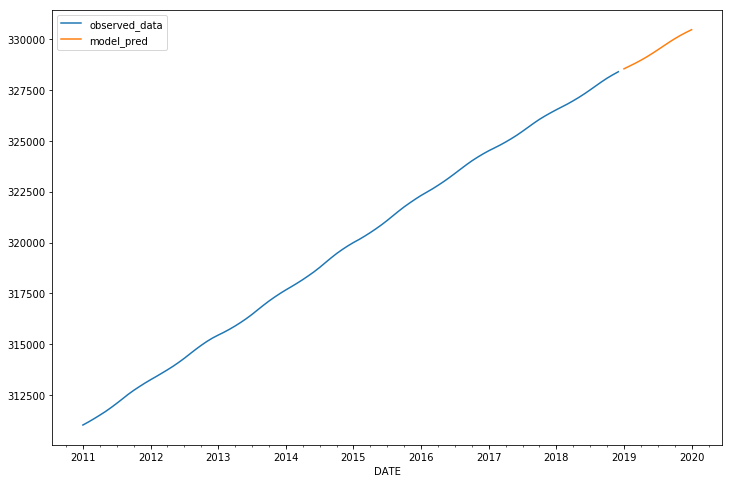

In [33]:
df['PopEst'].plot(figsize=(12,8), legend=True, label='observed_data')
model_pred.plot(figsize=(12,8), legend=True, label='model_pred')

### pmdarima

In [34]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import seasonal data
df1 = pd.read_csv('../Data/airline_passengers.csv', parse_dates=True, index_col='Month')
df1.index.freq = 'MS'
print (df1.head())

# import non-seasonal data
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv', parse_dates=True, index_col='Date')
df2.index.freq = 'D'
print (df2.head())

            Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121
            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


In [35]:
from pmdarima import auto_arima

In [36]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=10, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ch', stepwise=True, n_jobs=1, start_params=None, trend=None, method=None, transparams=True, solver='lbfgs', maxiter=50, disp=0, callback=None, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='warn', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The ``auto_arima`` function seeks to identify the most optimal
    parameters for an ``ARIMA`` model, and returns a fitted ARIMA model. This
    function is based on the commonly-used R functio

In [37]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.016 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.044 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.515, BIC=2480.001, Fit time=0.282 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.885, BIC=2485.268, Fit time=0.378 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.162 seconds
Total fit time: 0.960 seconds


C:\Users\HP\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [38]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Fri, 18 Mar 2022   AIC                           2460.154
Time:                        11:10:02   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [39]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=0, start_q=0, max_p=4, max_q=4, 
                          seasonal=True, trace=True, m=12)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.148 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1398.827, BIC=1407.716, Fit time=0.084 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1301.228, BIC=1316.042, Fit time=0.209 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=1304.383, BIC=1313.271, Fit

C:\Users\HP\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1278.175, BIC=1295.952, Fit time=0.460 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 12); AIC=1371.827, BIC=1386.641, Fit time=0.127 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1267.601, BIC=1288.341, Fit time=0.384 seconds


C:\Users\HP\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1269.486, BIC=1287.263, Fit time=0.482 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 12); AIC=1344.044, BIC=1361.821, Fit time=0.336 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 2.572 seconds


C:\Users\HP\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [40]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(0, 0, 1, 12)   Log Likelihood                -626.801
Date:                            Fri, 18 Mar 2022   AIC                           1267.601
Time:                                    11:10:05   BIC                           1288.341
Sample:                                         0   HQIC                          1276.029
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7024      0.168      4.169      0.000       0.372       1.033
ar.L1          1.4368      0.109     13.169      0.000       1.223       1.651
ar.L2         -0.7066      0.080     -8.815      0.000      -0.864      -0.549
ma.L1         -1.4832      0.174     -8.524      0.000      -1.824      -1.142
ma.L2          0.5033      0.175      2.877      0.004       0.160       0.846
ma.S.L12       0.7444      0.077      9.730      0.000       0.594       0.894
sigma2       345.6775     37.222      9.287      0.000     272.723     418.631
===================================================================================
Ljung-Box (Q):                      164.01   Jarque-Bera (JB):                10.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.46   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARMA and ARIMA

In [41]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [43]:
df1 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv', parse_dates=True, index_col='Date')
df1.index.freq = 'D'
df1 = df1[:120]

In [44]:
df2 = pd.read_csv('../Data/TradeInventories.csv', parse_dates=True, index_col='Date')
df2.index.freq = 'MS'

In [45]:
print (df1.head())
print (df2.head())

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
            Inventories
Date                   
1997-01-01      1301161
1997-02-01      1307080
1997-03-01      1303978
1997-04-01      1319740
1997-05-01      1327294


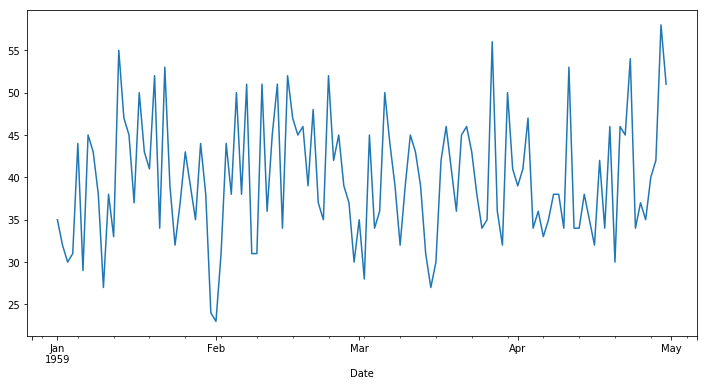

In [46]:
df1['Births'].plot(figsize=(12,6))

### Augmented Dickey Fuller test

In [47]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [48]:
adf_test(df1['Births'], 'DailyTotalFemaleBirths')

Augmented Dickey-Fuller Test: DailyTotalFemaleBirths
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [49]:
from pmdarima import auto_arima

In [50]:
auto_arima(df1['Births'], exogenous=None, 
           start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, 
           start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, 
           max_order=10, m=1, seasonal=False, trace=True).summary()

Fit ARIMA: order=(2, 0, 2); AIC=822.741, BIC=839.466, Fit time=0.234 seconds
Fit ARIMA: order=(0, 0, 0); AIC=823.489, BIC=829.064, Fit time=0.000 seconds
Fit ARIMA: order=(1, 0, 0); AIC=824.647, BIC=833.010, Fit time=0.000 seconds
Fit ARIMA: order=(0, 0, 1); AIC=824.747, BIC=833.110, Fit time=0.016 seconds
Fit ARIMA: order=(1, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2); AIC=830.714, BIC=850.226, Fit time=0.225 seconds
Fit ARIMA: order=(2, 0, 1); AIC=828.129, BIC=842.067, Fit time=0.078 seconds
Fit ARIMA: order=(2, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 1); AIC=826.399, BIC=837.549, Fit time=0.047 seconds
Fit ARIMA: order=(3, 0, 3); AIC=826.623, BIC=848.923, Fit time=0.604 seconds
Total fit time: 1.219 seconds


C:\Users\HP\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Fri, 18 Mar 2022   AIC                            822.741
Time:                        11:10:07   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8163      0.108    368.927      0.000      39.605      40.028
ar.L1.y        1.8569      0.081     22.944      0.000       1.698       2.016
ar.L2.y       -0.8815      0.073    -12.037      0.000      -1.025      -0.738
ma.L1.y       -1.8634      0.109    -17.131      0.000      -2.077      -1.650
ma.L2.y        0.8634      0.108      8.023      0.000       0.652       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0533           -0.1582j            1.0651           -0.0237
AR.2            1.0533           +0.1582j            1.0651            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1582           +0.0000j            1.1582            0.0000
-----------------------------------------------------------------------------
"""

In [51]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [52]:
model = ARMA(train['Births'], order=(2,2))
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Fri, 18 Mar 2022   AIC                            627.809
Time:                        11:10:07   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7433           +0.0000j            1.7433            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [53]:
start = len(train)
end = len(train) + len(test) - 1

In [54]:
pred = fitted_model.predict(start,end).rename('pred_ARMA(2,2)')

In [55]:
pred

1959-04-01    39.982216
1959-04-02    39.992614
1959-04-03    39.809827
1959-04-04    39.848173
1959-04-05    39.761536
1959-04-06    39.794253
1959-04-07    39.750498
1959-04-08    39.772831
1959-04-09    39.749658
1959-04-10    39.763665
1959-04-11    39.750989
1959-04-12    39.759430
1959-04-13    39.752352
1959-04-14    39.757334
1959-04-15    39.753333
1959-04-16    39.756241
1959-04-17    39.753962
1959-04-18    39.755649
1959-04-19    39.754345
1959-04-20    39.755321
1959-04-21    39.754572
1959-04-22    39.755135
1959-04-23    39.754706
1959-04-24    39.755030
1959-04-25    39.754783
1959-04-26    39.754970
1959-04-27    39.754828
1959-04-28    39.754936
1959-04-29    39.754854
1959-04-30    39.754916
Freq: D, Name: pred_ARMA(2,2), dtype: float64

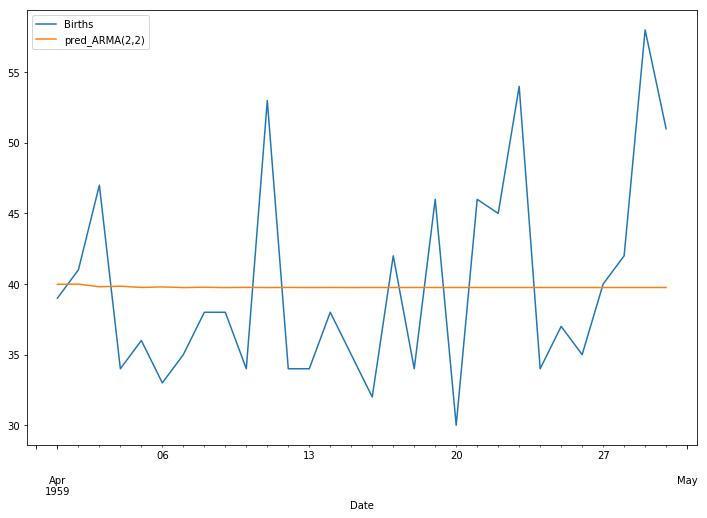

In [56]:
test.plot(figsize=(12,8),legend=True)
pred.plot(figsize=(12,8),legend=True)

In [57]:
test.mean()

Births    39.833333
dtype: float64

In [58]:
pred.mean()

39.77743188846464

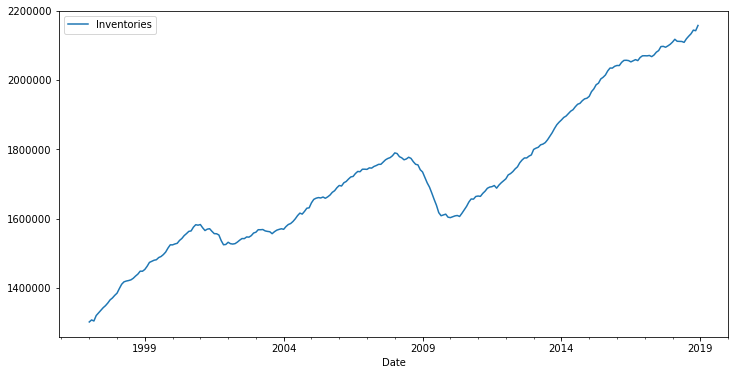

In [59]:
df2.plot(figsize=(12,6))

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

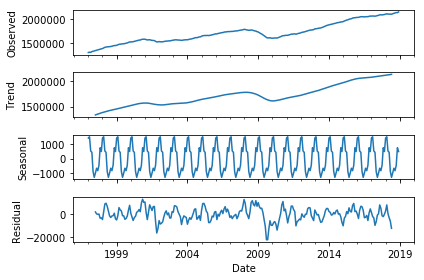

In [61]:
result = seasonal_decompose(df2['Inventories'], model='add')
result.plot();

In [62]:
auto_arima(df2['Inventories'], exogenous=None, 
           start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, 
           start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, 
           max_order=10, m=1, seasonal=False, trace=True).summary()

Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.031 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.016 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.103 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.528, BIC=5247.389, Fit time=0.093 seconds
Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.089 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.137 seconds
Total fit time: 0.501 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.258
Date:                Fri, 18 Mar 2022   AIC                           5228.505
Time:                        11:10:09   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3472.9857   1313.669      2.644      0.009     898.241    6047.731
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

In [63]:
adf_test(df2['Inventories'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.087684
p-value                   0.950652
# lags used               5.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [64]:
from statsmodels.tsa.statespace.tools import diff

In [65]:
df2['diff1'] = diff(df2['Inventories'],k_diff=1)

In [66]:
adf_test(df2['diff1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


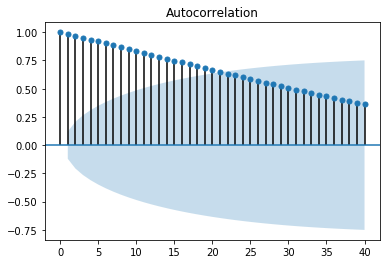

In [67]:
plot_acf(df2['Inventories'], lags=40);

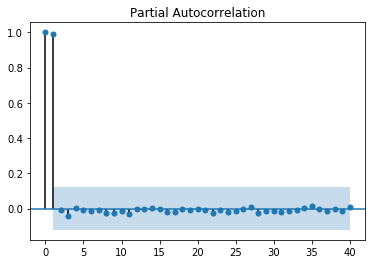

In [68]:
plot_pacf(df2['Inventories'], lags=40);

In [69]:
auto_arima(df2['Inventories'], exogenous=None, 
           start_p=0, d=None, start_q=0, max_p=2, max_d=2, max_q=2, 
           start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, 
           max_order=10, m=1, seasonal=False, trace=True).summary()

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.044 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.014 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.086 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.528, BIC=5247.389, Fit time=0.073 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.129 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.461 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.258
Date:                Fri, 18 Mar 2022   AIC                           5228.505
Time:                        11:10:11   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3472.9857   1313.669      2.644      0.009     898.241    6047.731
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

In [70]:
len(df2)

264

In [71]:
train = df2.iloc[:252] 
test = df2.iloc[252:]

In [72]:
model = ARIMA(train['Inventories'], order=(1, 1, 1))
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Fri, 18 Mar 2022   AIC                           4980.790
Time:                        11:10:11   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.871      2.378      0.018     561.671    5833.468
ar.L1.D.Inventories     0.9026      0.039     23.010      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [73]:
start = len(train)
end = len(train) + len(test) - 1

In [74]:
pred_ARIMA = fitted_model.predict(start,end,typ='levels').rename('ARIMA_(1,1,1)')

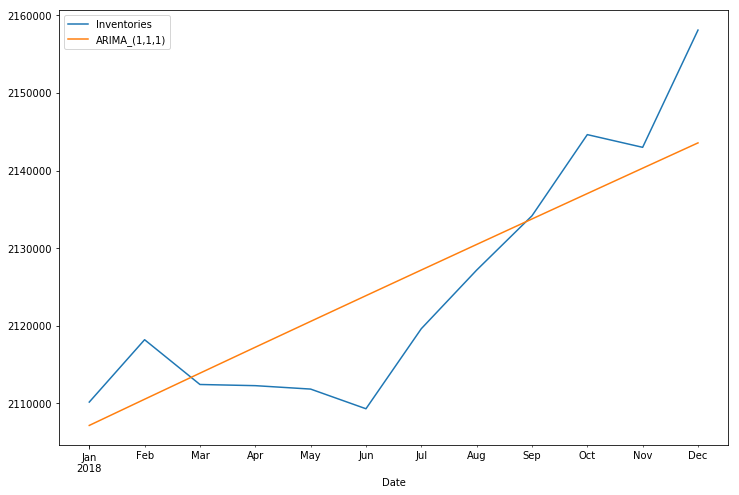

In [75]:
test['Inventories'].plot(figsize=(12,8),legend=True)
pred_ARIMA.plot(figsize=(12,8),legend=True)

In [76]:
reg_eval_metrics(test['Inventories'], pred_ARIMA)

MAE:  6376.313462885718
MSE:  60677824.72190262
RMSE:  7789.597211788464


In [77]:
test['Inventories'].mean()

2125075.6666666665

In [78]:
(7754.5472114664 / 2125075.6666666665)*100

0.3649068752281166

### Forecast into the unknown future

In [79]:
final_model = ARIMA(df2['Inventories'], (1,1,1))
final_fitted_model = final_model.fit()
final_fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.258
Date:                Fri, 18 Mar 2022   AIC                           5228.505
Time:                        11:10:12   BIC                           5242.794
Sample:                    02-01-1997   HQIC                          5234.247
                         - 12-01-2018                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3472.9857   1313.669      2.644      0.009     898.241    6047.731
ar.L1.D.Inventories     0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.Inventories    -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

In [80]:
final_forecast = final_fitted_model.predict(len(df2), len(df2)+11, typ='levels').rename('ARIMA (1,1,1)_forecast')

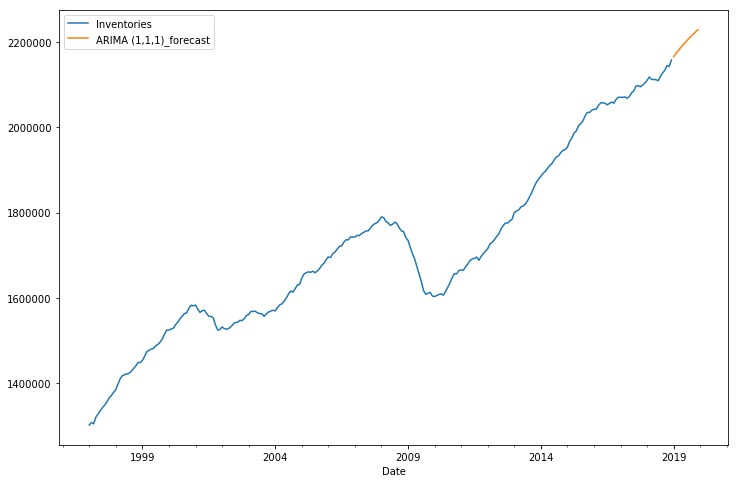

In [81]:
df2['Inventories'].plot(figsize=(12,8),legend=True)
final_forecast.plot(figsize=(12,8),legend=True)